In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [23]:
df = pd.read_csv('incidents_small.csv', nrows=10000, parse_dates=['Date'])  #parse_dates is used tp make date as datetime type and not a key value 
df.shape

(10000, 13)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   IncidntNum  10000 non-null  int64         
 1   Category    10000 non-null  object        
 2   Descript    10000 non-null  object        
 3   DayOfWeek   10000 non-null  object        
 4   Date        10000 non-null  datetime64[ns]
 5   Time        10000 non-null  object        
 6   PdDistrict  10000 non-null  object        
 7   Resolution  10000 non-null  object        
 8   Address     10000 non-null  object        
 9   X           10000 non-null  float64       
 10  Y           10000 non-null  float64       
 11  Location    10000 non-null  object        
 12  PdId        10000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1015.8+ KB


In [25]:
df.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [27]:
cols_to_drop = ['IncidntNum', 'Address', 'Location', 'PdId']
df.drop(columns = cols_to_drop, inplace=True)

In [28]:
df['Category'] = df['Category'].apply(lambda val: val.lower())    #apply function is used to apply a condition on a given data like making capital or small and df['Category']= means store the updated data in the same column

In [29]:
df['Descript'] = df['Descript'].apply(lambda val: val.lower())
df['PdDistrict'] = df['PdDistrict'].apply(lambda val: val.lower())

In [30]:
df.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,X,Y
0,weapon laws,poss of prohibited weapon,Friday,2016-01-29,11:00,southern,"ARREST, BOOKED",-122.403405,37.775421
1,weapon laws,"firearm, loaded, in vehicle, possession or use",Friday,2016-01-29,11:00,southern,"ARREST, BOOKED",-122.403405,37.775421
2,warrants,warrant arrest,Monday,2016-04-25,14:59,bayview,"ARREST, BOOKED",-122.388856,37.729981
3,non-criminal,lost property,Tuesday,2016-01-05,23:50,tenderloin,NONE,-122.412971,37.785788
4,non-criminal,lost property,Friday,2016-01-01,00:30,mission,NONE,-122.419672,37.765050


In [33]:
df['Category'].value_counts()  #To see the unique value in the data by different data columns 

larceny/theft                  1562
other offenses                 1473
non-criminal                   1238
assault                        1073
warrants                        555
vehicle theft                   529
vandalism                       475
burglary                        458
suspicious occ                  440
drug/narcotic                   396
missing person                  364
robbery                         268
fraud                           188
secondary codes                 146
trespass                        145
weapon laws                     141
recovered vehicle                77
sex offenses, forcible           74
prostitution                     59
stolen property                  55
drunkenness                      50
forgery/counterfeiting           48
disorderly conduct               44
driving under the influence      32
arson                            28
kidnapping                       22
runaway                          13
bribery                     

In [34]:
categorydf = df.groupby(['Category', 'PdDistrict'], as_index = False)['Descript'].count()
categorydf

,Category,PdDistrict,Descript
0,arson,bayview,5
1,arson,central,3
2,arson,ingleside,2
3,arson,mission,4
4,arson,northern,1
...,...,...,...
288,weapon laws,park,6
289,weapon laws,richmond,8
290,weapon laws,southern,31
291,weapon laws,taraval,7


In [35]:
categorydf[categorydf['Category'] == 'arson']   #Apply filter to find specific data acc to condition

,Category,PdDistrict,Descript
0,arson,bayview,5
1,arson,central,3
2,arson,ingleside,2
3,arson,mission,4
4,arson,northern,1
5,arson,park,3
6,arson,southern,5
7,arson,taraval,2
8,arson,tenderloin,3


In [36]:
categorydf[categorydf['Category'] == 'weapon laws']

,Category,PdDistrict,Descript
283,weapon laws,bayview,17
284,weapon laws,central,9
285,weapon laws,ingleside,10
286,weapon laws,mission,25
287,weapon laws,northern,13
288,weapon laws,park,6
289,weapon laws,richmond,8
290,weapon laws,southern,31
291,weapon laws,taraval,7
292,weapon laws,tenderloin,15


Syntax of making FILTER 

#Dataframe Filtering technique

df[ df['column'] == 'value']


In [38]:
timeline_df = df[['Date', 'Category', 'PdDistrict']].copy()   #Create a subset as timeline by taking 3 cols in it and set index column for further references
timeline_df.sort_values(by='Date', inplace=True)
timeline_df.set_index('Date', inplace=True)

In [39]:
timeline_df.resample('M').count()['Category']   #Rearrange and collect the data according to month  and count the values  resample is only used in time series data

Date
2016-01-31    2097
2016-02-29    2383
2016-03-31    3359
2016-04-30    1321
2016-05-31      82
2016-06-30     111
2016-07-31     149
2016-08-31     160
2016-09-30     138
2016-10-31     182
2016-11-30      13
2016-12-31       5
Freq: M, Name: Category, dtype: int64

<AxesSubplot: xlabel='Date'>

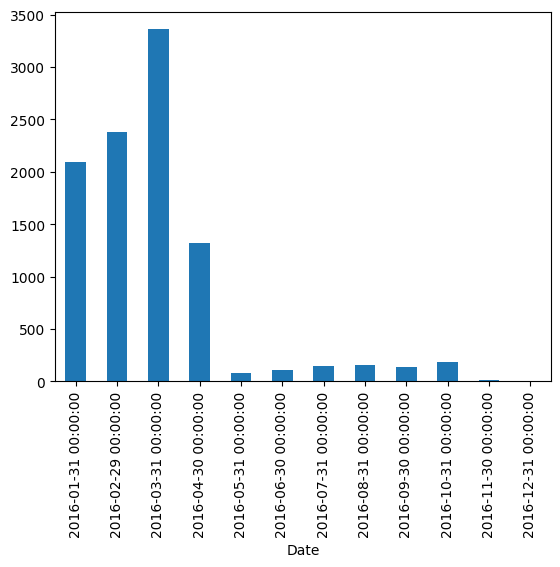

In [41]:
timeline_df.resample('M').count()['Category'].plot(kind = 'bar')

M is used for MONTH, W is used for WEEK, 2M/3M for 2 months 3  months together same for week, can be done even in seconds    
Only Applicable in time series data 

<AxesSubplot: xlabel='Date'>

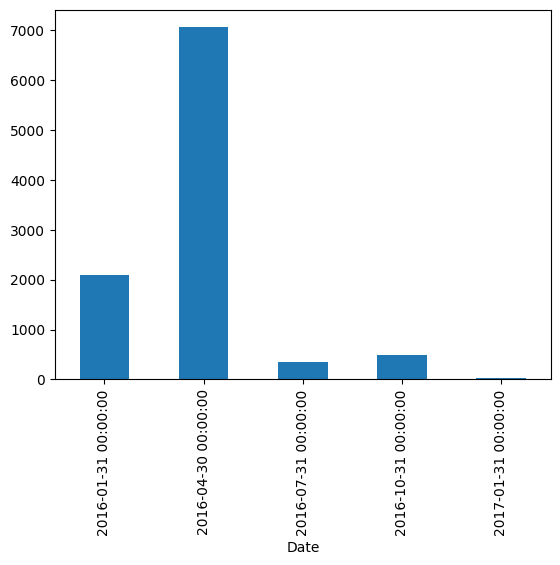

In [43]:
timeline_df.resample('3M').count()['Category'].plot(kind = 'bar')

Using   SEABORN

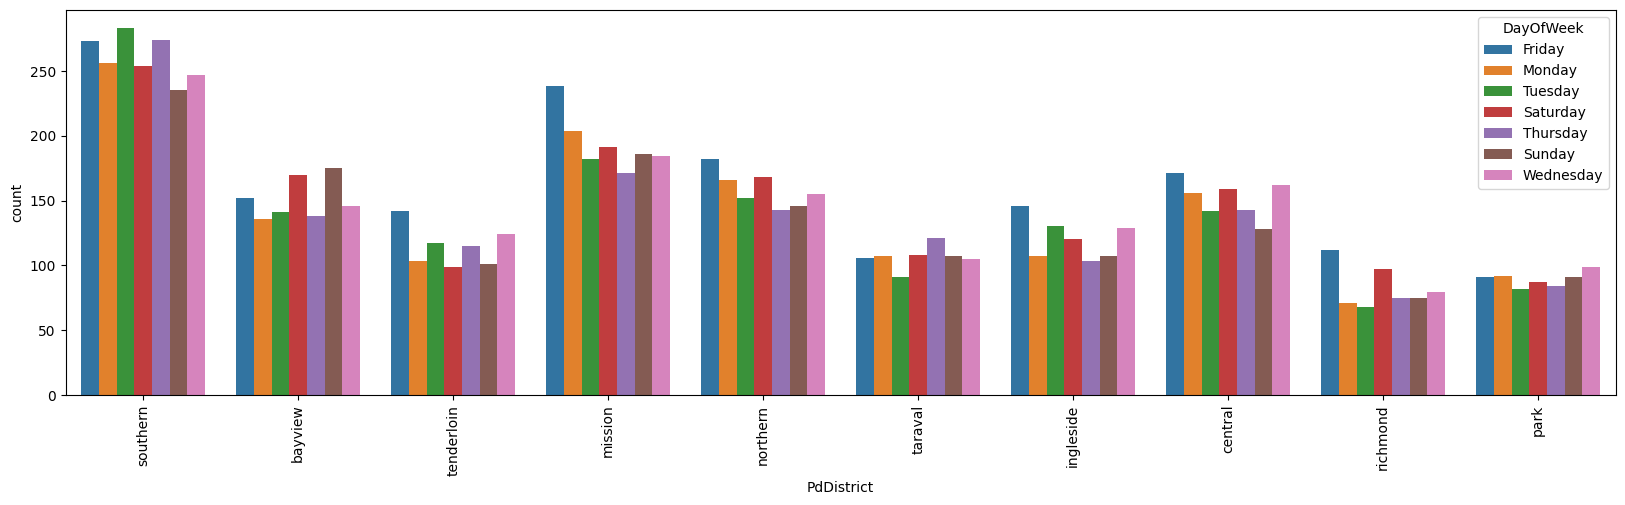

In [45]:
fig, ax = plt.subplots(figsize= (20, 5))   #This line creates a 20, 5 size chart
sns.countplot(df, x = 'PdDistrict', ax= ax, hue='DayOfWeek')   #hue is used for grouping in categories
plt.xticks(rotation = 90)
plt.show()

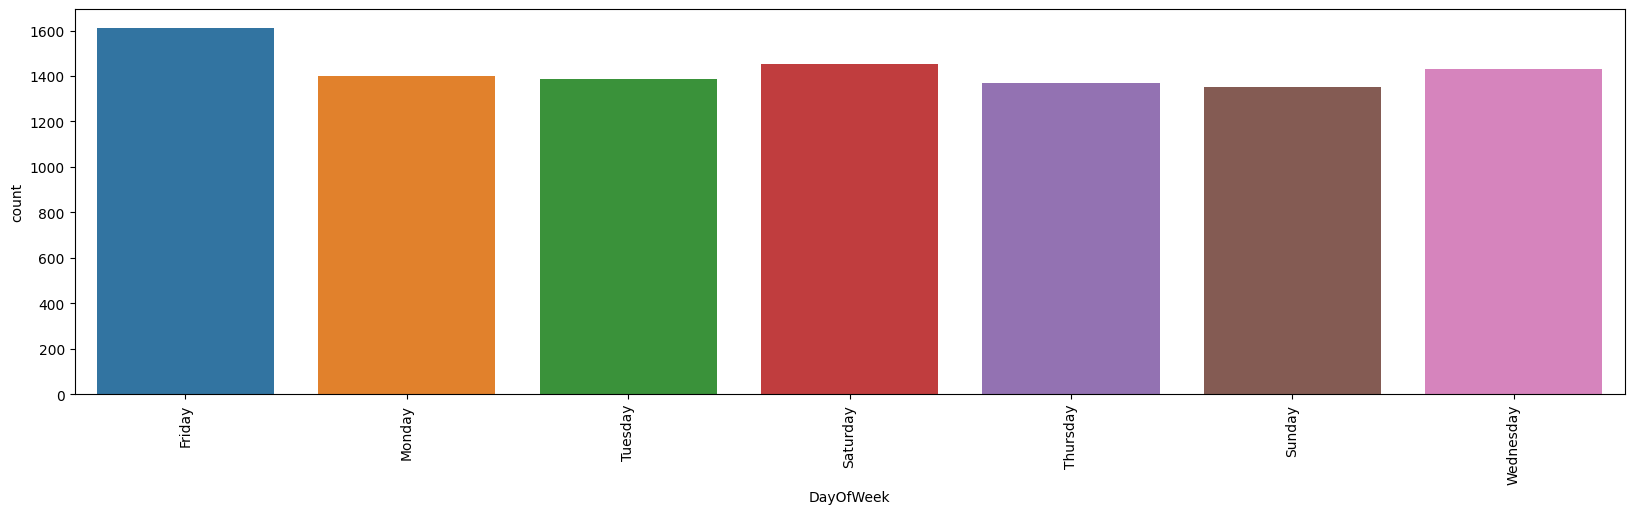

In [47]:
fig, ax = plt.subplots(figsize= (20, 5))  
sns.countplot(df, x = 'DayOfWeek', ax= ax)  
plt.xticks(rotation = 90)
plt.show()

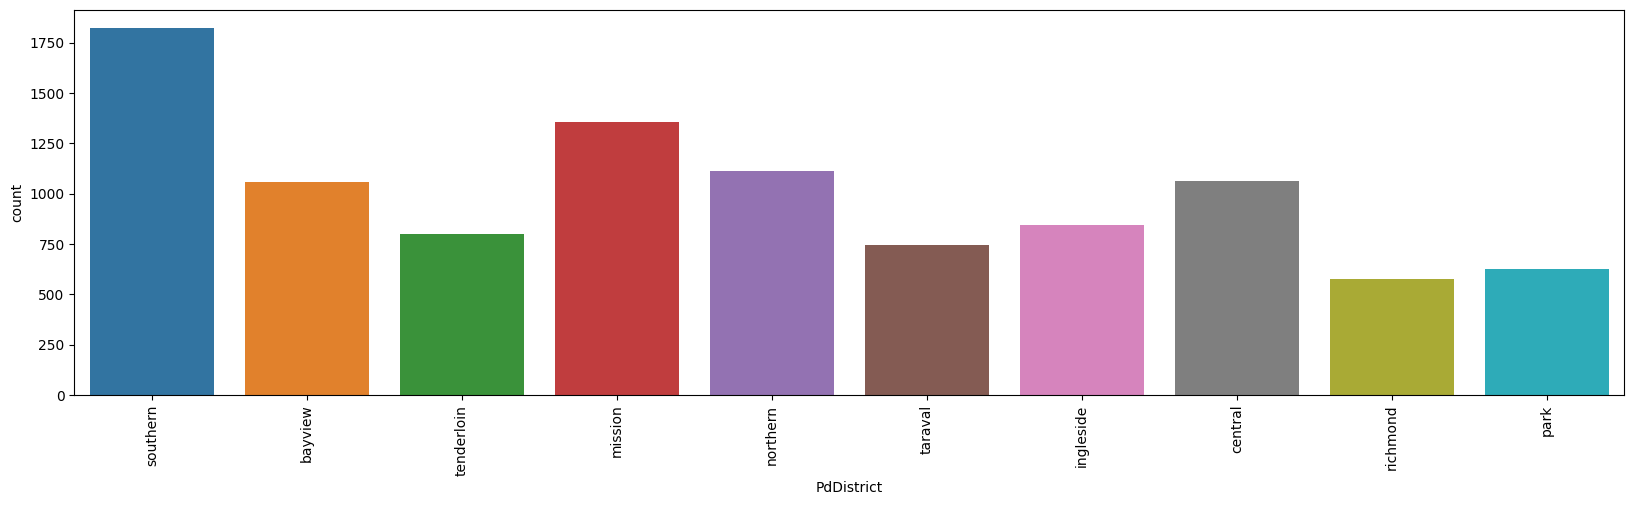

In [46]:
fig, ax = plt.subplots(figsize= (20, 5))  
sns.countplot(df, x = 'PdDistrict', ax= ax)  
plt.xticks(rotation = 90)
plt.show()

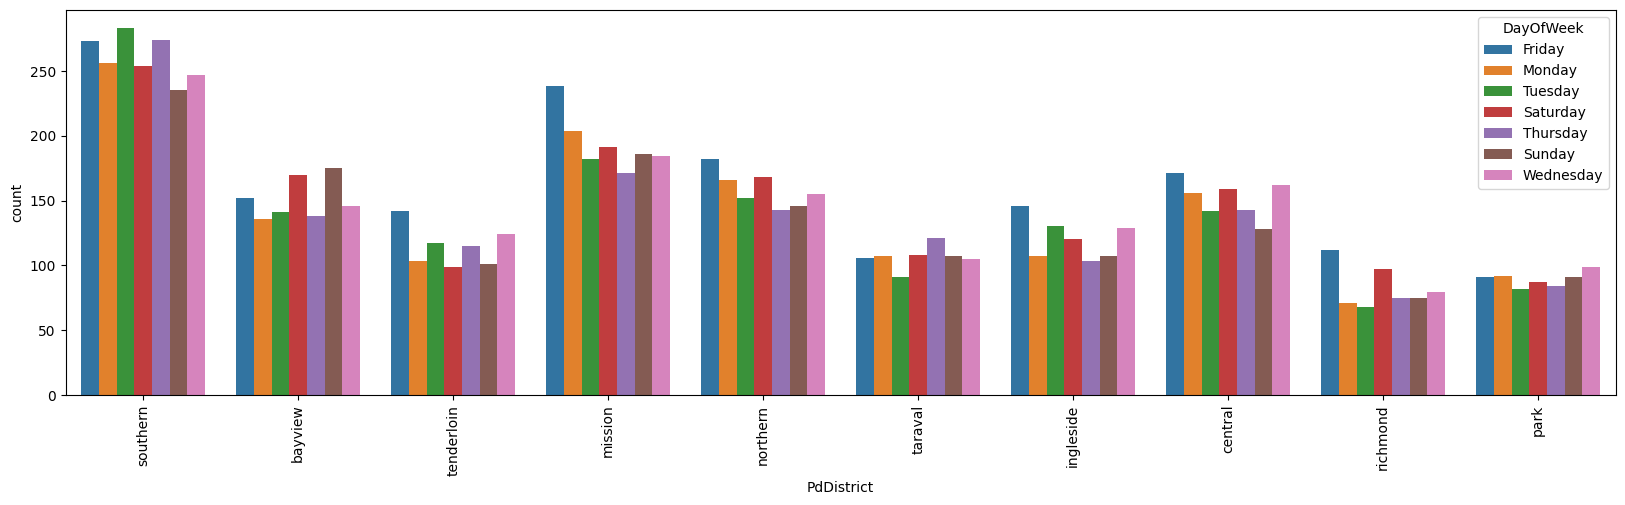

In [48]:
fig, ax = plt.subplots(figsize= (20, 5))  
sns.countplot(df, x = 'PdDistrict', ax= ax, hue='DayOfWeek')  
plt.xticks(rotation = 90)
plt.show()

Installing FOLIUM 

pip install folium 